In [ ]:
all_txns = []

with open('/content/Electronics_transactions.csv') as f:
    # Read each line from the file
    content = f.readlines()
    # Remove white space from the beginning and end of each line
    txns = [x.strip() for x in content if x.strip()]  # Ignore empty lines

    # Iterate through each line and create a list of transactions
    for each_txn in txns:
        # Split the transaction items by comma and filter out any empty items
        txn_items = [item for item in each_txn.split(',') if item]
        if txn_items:  # Only append non-empty transactions
            all_txns.append(txn_items) #read data and convert into trasaction

In [ ]:
all_txns[0:5]

[['Mouse', 'Headphones', 'Charger', 'Printer', 'Game_Console'],
 ['Projector',
  'Smart_Home_Device',
  'Power_Bank',
  'USB_Cable',
  'Laptop',
  'External_Hard_Drive',
  'Charger'],
 ['Memory_Card', 'Charger', 'Tablet', 'Router', 'Printer', 'Smartphone'],
 ['Smartwatch',
  'Monitor',
  'Charger',
  'Wireless_Earbuds',
  'Headphones',
  'USB_Cable'],
 ['Printer', 'Smartphone', 'Game_Console', 'Bluetooth_Speaker', 'Charger']]

In [ ]:
# Import all required libraries
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules #mixtend machine learing extend , apriori algorith , association riule for defening rules

In [ ]:
# Initialize OnehotTransactions
one_hot_encoding = TransactionEncoder()
# Transform the data into one-hot-encoding format
one_hot_txns = one_hot_encoding.fit(all_txns).transform(all_txns)
# Conver the matrix into the dataframe.
one_hot_txns_df = pd.DataFrame(one_hot_txns,
                               columns=one_hot_encoding.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
one_hot_txns_df.iloc[5:10, 0:20]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Bluetooth_Speaker,Camera,Charger,External_Hard_Drive,Game_Console,Headphones,Keyboard,Laptop,Memory_Card,Monitor,Mouse,Power_Bank,Printer,Projector,Router,Smart_Home_Device,Smart_TV,Smartphone,Smartwatch,Speakers
5,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True
6,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
7,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
8,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
9,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
len(one_hot_txns_df.columns)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


25

In [ ]:
frequent_itemsets = apriori(one_hot_txns_df,
                            min_support=0.02,
                            use_colnames=True)  # value of min support 0.02 , that that item support is more common in the dataset , this is a hyper parameter which we can tune it by changing the value rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets.sample(10, random_state = 90)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
224,0.030821,"(Mouse, Smart_Home_Device)"
280,0.028754,"(Smart_TV, Smart_Home_Device)"
130,0.026499,"(Tablet, Game_Console)"
186,0.026123,"(Laptop, VR_Headset)"
149,0.025183,"(Tablet, Headphones)"
209,0.028378,"(Monitor, Router)"
94,0.026499,"(External_Hard_Drive, Game_Console)"
247,0.028190,"(Printer, Projector)"
283,0.026499,"(Speakers, Smart_Home_Device)"
272,0.024807,"(Smartphone, Router)"


In [ ]:
frequent_itemsets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.166134,(Bluetooth_Speaker)
1,0.156550,(Camera)
2,0.156737,(Charger)
3,0.158429,(External_Hard_Drive)
4,0.157677,(Game_Console)


In [ ]:
rules = association_rules(frequent_itemsets, # itemsets
                          metric="lift",     # lift
                          min_threshold=1, num_itemsets=10)  # ass rule set of rule build in python , min threshold is atleast 1 i.e lift > 1 , num itemset 10 we want

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Camera),(Bluetooth_Speaker),0.156550,0.166134,0.026875,0.171669,1.033313,1.0,0.000866,1.006681,0.038223,0.090851,0.006637,0.166717
1,(Bluetooth_Speaker),(Camera),0.166134,0.156550,0.026875,0.161765,1.033313,1.0,0.000866,1.006222,0.038662,0.090851,0.006183,0.166717
2,(Charger),(Bluetooth_Speaker),0.156737,0.166134,0.026311,0.167866,1.010422,1.0,0.000271,1.002081,0.012232,0.088720,0.002076,0.163118
3,(Bluetooth_Speaker),(Charger),0.166134,0.156737,0.026311,0.158371,1.010422,1.0,0.000271,1.001941,0.012370,0.088720,0.001937,0.163118
4,(Game_Console),(Bluetooth_Speaker),0.157677,0.166134,0.031385,0.199046,1.198107,1.0,0.005190,1.041091,0.196302,0.107326,0.039470,0.193980


In [ ]:
rules.sort_values('lift',
                   ascending = False)[0:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
82,(Charger),(Memory_Card),0.156737,0.173276,0.033828,0.215827,1.245572,1.0,0.006669,1.054263,0.233801,0.114213,0.051470,0.205528
83,(Memory_Card),(Charger),0.173276,0.156737,0.033828,0.195228,1.245572,1.0,0.006669,1.047828,0.238478,0.114213,0.045645,0.205528
25,(Bluetooth_Speaker),(Smartphone),0.166134,0.160308,0.032701,0.196833,1.227838,1.0,0.006068,1.045475,0.222530,0.111324,0.043497,0.200409
24,(Smartphone),(Bluetooth_Speaker),0.160308,0.166134,0.032701,0.203986,1.227838,1.0,0.006068,1.047552,0.220987,0.111324,0.045393,0.200409
280,(Power_Bank),(Monitor),0.162563,0.162375,0.032137,0.197688,1.217474,1.0,0.005740,1.044013,0.213302,0.109756,0.042158,0.197802
281,(Monitor),(Power_Bank),0.162375,0.162563,0.032137,0.197917,1.217474,1.0,0.005740,1.044077,0.213254,0.109756,0.042216,0.197802
55,(Router),(Camera),0.153167,0.156550,0.028754,0.187730,1.199174,1.0,0.004776,1.038387,0.196134,0.102341,0.036968,0.185702
54,(Camera),(Router),0.156550,0.153167,0.028754,0.183673,1.199174,1.0,0.004776,1.037371,0.196920,0.102341,0.036025,0.185702
174,(Wireless_Earbuds),(Game_Console),0.164067,0.157677,0.031009,0.189003,1.198674,1.0,0.005140,1.038627,0.198275,0.106658,0.037190,0.192833
175,(Game_Console),(Wireless_Earbuds),0.157677,0.164067,0.031009,0.196663,1.198674,1.0,0.005140,1.040575,0.196771,0.106658,0.038993,0.192833


In [ ]:
# Sort the rules by confidence and get the top 10
top10_rules = rules.sort_values(by='confidence', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install pandas mlxtend matplotlib networkx

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Set up the graph
plt.figure(figsize=(10, 6))
G = nx.DiGraph()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1000x600 with 0 Axes>

In [ ]:
# Add nodes and edges for top 10 rules
for idx, rule in top10_rules.iterrows():
    for item in rule['antecedents']:
        G.add_node(item, label=item)
    for item in rule['consequents']:
        G.add_node(item, label=item)
    G.add_edge(list(rule['antecedents'])[0], list(rule['consequents'])[0], weight=rule['confidence'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


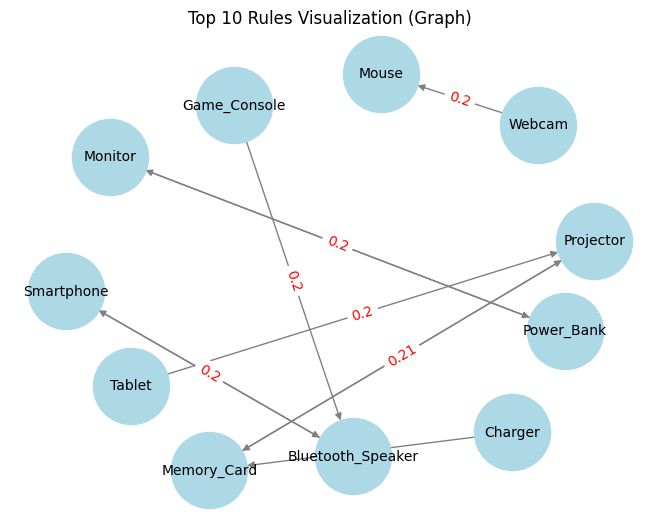

In [ ]:
# Create a layout for the graph
pos = nx.spring_layout(G, k=2)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_size=10, node_size=3000, edge_color='gray', arrows=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: round(v, 2) for k, v in labels.items()}, font_color='red')

# Show the plot
plt.title("Top 10 Rules Visualization (Graph)")
plt.show()

In [ ]:
print(top10_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

             antecedents          consequents   support  confidence      lift
82             (Charger)        (Memory_Card)  0.033828    0.215827  1.245572
261          (Projector)        (Memory_Card)  0.034768    0.206935  1.194254
24          (Smartphone)  (Bluetooth_Speaker)  0.032701    0.203986  1.227838
260        (Memory_Card)          (Projector)  0.034768    0.200651  1.194254
4         (Game_Console)  (Bluetooth_Speaker)  0.031385    0.199046  1.198107
281            (Monitor)         (Power_Bank)  0.032137    0.197917  1.217474
280         (Power_Bank)            (Monitor)  0.032137    0.197688  1.217474
315             (Webcam)              (Mouse)  0.031949    0.197674  1.195256
358             (Tablet)          (Projector)  0.030445    0.197320  1.174431
25   (Bluetooth_Speaker)         (Smartphone)  0.032701    0.196833  1.227838


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Intrepretation:
Top Associations:

Charger → Memory Card: Highest confidence (21.58%) and lift (1.25), suggesting a strong relationship.

Smartphone → Bluetooth Speaker: Also significant, with confidence (20.39%) and lift (1.22).

Other Notable Relationships:

Projector → Memory Card and Memory Card → Projector: Both show moderate support and lift, indicating a mutual relationship.

Game Console → Bluetooth Speaker and Tablet → Projector: Both have lift values > 1, indicating a potential cross-selling opportunity.

In [ ]:
# prompt: convert /content/2311051_AMA_electron.ipynb to html

!jupyter nbconvert --to html /content/2311051_AMA_electron.ipynb


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[NbConvertApp] Converting notebook /content/2311051_AMA_electron.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 437160 bytes to /content/2311051_AMA_electron.html
